In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#Sentiment analysis
afinn = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\CSV files\Afinn.csv', sep=',', encoding='latin-1')
affinity_scores = afinn.set_index('word')['value'].to_dict()

### Loading Positive feedbacks

In [3]:
positive = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\11. Text Mining\positive-words.txt',
                       names = ['positive_word'],
                       error_bad_lines=False,
                       encoding='latin-1')
positive

,positive_word
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1,;
2,; Opinion Lexicon: Positive
3,;
4,; This file contains a list of POSITIVE opinio...
...,...
2035,youthful
2036,zeal
2037,zenith
2038,zest


In [4]:
#Custom function :score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [5]:
calculate_sentiment(text = 'brilliant')

4

In [6]:
positive['sentiment_value'] = positive['positive_word'].apply(calculate_sentiment)
positive

,positive_word,sentiment_value
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,0
1,;,0
2,; Opinion Lexicon: Positive,2
3,;,0
4,; This file contains a list of POSITIVE opinio...,2
...,...,...
2035,youthful,2
2036,zeal,0
2037,zenith,0
2038,zest,0


C:\Users\lenovo\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

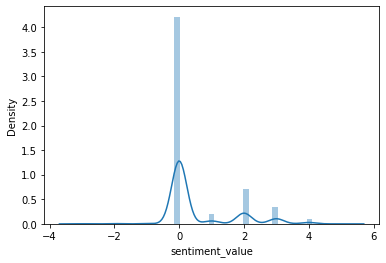

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(positive['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

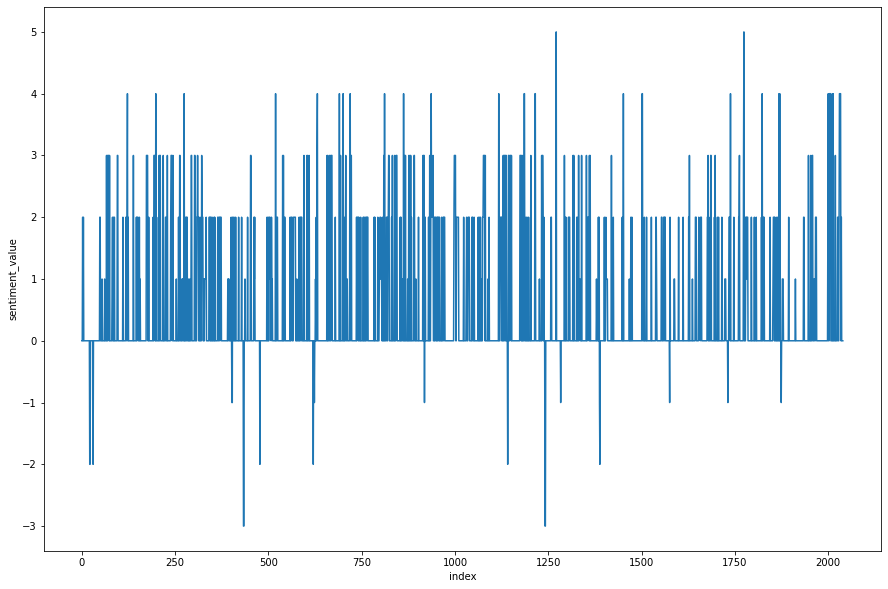

In [9]:
positive['index']=range(0,len(positive))
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',
             x='index',data=positive)

In [10]:
# remove both the leading and the trailing characters
positive = [positive_word.strip() for positive_word in positive.positive_word]
# removes empty strings, because they are considered in Python as False
positive = [positive_word for positive_word in positive if positive_word]
positive

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 ';',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge',
 ';       Discovery and Data Mining (KDD-2004)',
 ';       Washington',
 ';   Bing Liu',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th',
 ';       International World Wide Web conference (WWW-2005)',
 ';       2005',
 ';',
 '; Notes:',
 ';    1. The appearance of an opinion word in a sentence does not necessarily',
 ';       mean that the sentence expresses a positive or negative opinion.',
 ';       See the paper below:',
 ';',
 ';       Bing

In [11]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(positive))
sentences[5:15]

['The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion.',
 ';       See the paper below: ; ;       Bing Liu.',
 '"Sentiment Analysis and Subjectivity."',
 'An chapter in ;          Handbook of Natural Language Processing ;          (editors: N. Indurkhya and F. J. Damerau) ; ;    2.',
 'You will notice many misspelled words in the list.',
 'They are not ;       mistakes.',
 'They are included as these misspelled words appear ;       frequently in social media content.',
 '; ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; a+ abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolades accommodative accomodative accomplish accomplished accomplishment accomplishments accurate accurately achievable achievement achievements achievible acumen adaptable adaptive adequate adjustable admirable admirably admiration admire admirer admirin

In [12]:
positive_df = pd.DataFrame(sentences, columns=['positive_sentences'])
positive_df

,positive_sentences
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1,; ; This file and the papers can all be downlo...
2,"""Mining and Summarizing Customer Reviews."""
3,; Proceedings of the ACM SIGKDD Internat...
4,Proceedings of the 14th ; International ...
5,The appearance of an opinion word in a sentenc...
6,; See the paper below: ; ; Bing Liu.
7,"""Sentiment Analysis and Subjectivity."""
8,An chapter in ; Handbook of Natural L...
9,You will notice many misspelled words in the l...


In [13]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_lg')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        positive_sentences = nlp(text)
        for word in positive_sentences:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [14]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [15]:
positive_df['sentiment_value'] = positive_df['positive_sentences'].apply(calculate_sentiment)
positive_df

,positive_sentences,sentiment_value
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,4
1,; ; This file and the papers can all be downlo...,0
2,"""Mining and Summarizing Customer Reviews.""",0
3,; Proceedings of the ACM SIGKDD Internat...,0
4,Proceedings of the 14th ; International ...,0
5,The appearance of an opinion word in a sentenc...,-4
6,; See the paper below: ; ; Bing Liu.,0
7,"""Sentiment Analysis and Subjectivity.""",0
8,An chapter in ; Handbook of Natural L...,0
9,You will notice many misspelled words in the l...,0


### Loading Negative feedbacks

In [16]:
negative = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\11. Text Mining\negative-words.txt',
                       names = ['negative_word'],
                       delimiter='\t',
                       error_bad_lines=False)
negative

,negative_word
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1,;
2,; Opinion Lexicon: Negative
3,;
4,; This file contains a list of NEGATIVE opinio...
...,...
4812,zaps
4813,zealot
4814,zealous
4815,zealously


In [17]:
#Custom function :score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [18]:
negative['sentiment_value'] = negative['negative_word'].apply(calculate_sentiment)
negative

,negative_word,sentiment_value
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,0
1,;,0
2,; Opinion Lexicon: Negative,-2
3,;,0
4,; This file contains a list of NEGATIVE opinio...,-2
...,...,...
4812,zaps,0
4813,zealot,-2
4814,zealous,2
4815,zealously,0


C:\Users\lenovo\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


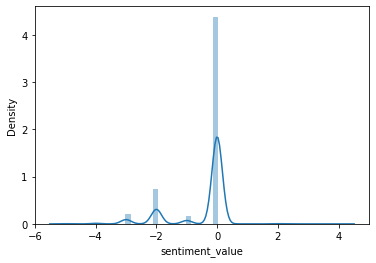

In [20]:
sns.distplot(negative['sentiment_value'])
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

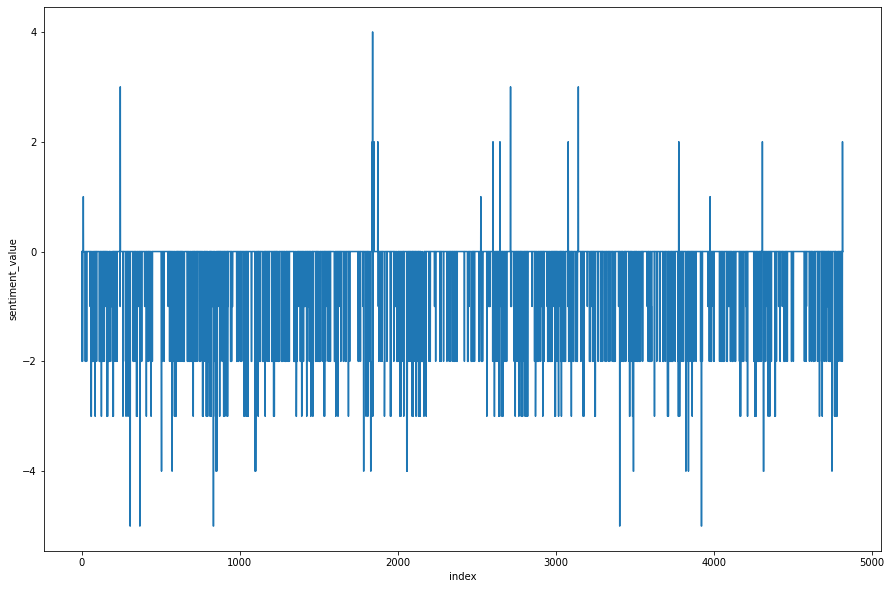

In [21]:
negative['index']=range(0,len(negative))
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',
             x='index',data=negative)

In [22]:
# remove both the leading and the trailing characters
negative = [negative_word.strip() for negative_word in negative.negative_word]
negative

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 ';',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,',
 ';       Washington, USA,',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th',
 ';       International World Wide Web conference (WWW-2005), May 10-14,',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes:',
 ';    1. The appearance of an opinion wor

In [23]:
negative = [negative_word for negative_word in negative if negative_word]
negative

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 ';',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,',
 ';       Washington, USA,',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th',
 ';       International World Wide Web conference (WWW-2005), May 10-14,',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes:',
 ';    1. The appearance of an opinion wor

In [24]:
from nltk import tokenize
negative_sentences = tokenize.sent_tokenize(" ".join(negative))
negative_sentences[3:30]

[';       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ;       Washington, USA, ;   Bing Liu, Minqing Hu and Junsheng Cheng.',
 '"Opinion Observer: Analyzing ;       and Comparing Opinions on the Web."',
 'Proceedings of the 14th ;       International World Wide Web conference (WWW-2005), May 10-14, ;       2005, Chiba, Japan.',
 '; ; Notes: ;    1.',
 'The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion.',
 ';       See the paper below: ; ;       Bing Liu.',
 '"Sentiment Analysis and Subjectivity."',
 'An chapter in ;          Handbook of Natural Language Processing, Second Edition, ;          (editors: N. Indurkhya and F. J. Damerau), 2010. ; ;    2.',
 'You will notice many misspelled words in the list.',
 'They are not ;       mistakes.',
 'They are included as these misspelled words appear ;       fr

In [25]:
negative_df = pd.DataFrame(negative_sentences, columns=['negative_sentences'])
negative_df

,negative_sentences
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1,; ; This file and the papers can all be downlo...
2,"""Mining and Summarizing Customer Reviews."""
3,; Proceedings of the ACM SIGKDD Internat...
4,"""Opinion Observer: Analyzing ; and Compa..."
5,Proceedings of the 14th ; International ...
6,; ; Notes: ; 1.
7,The appearance of an opinion word in a sentenc...
8,; See the paper below: ; ; Bing Liu.
9,"""Sentiment Analysis and Subjectivity."""


In [26]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        negative_sentences = nlp(text)
        for word in negative_sentences:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
# test that it works
calculate_sentiment(text = 'great')

3

In [28]:
negative_df['sentiment_value'] = negative_df['negative_sentences'].apply(calculate_sentiment)
negative_df

,negative_sentences,sentiment_value
0,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,-4
1,; ; This file and the papers can all be downlo...,1
2,"""Mining and Summarizing Customer Reviews.""",0
3,; Proceedings of the ACM SIGKDD Internat...,0
4,"""Opinion Observer: Analyzing ; and Compa...",0
5,Proceedings of the 14th ; International ...,0
6,; ; Notes: ; 1.,0
7,The appearance of an opinion word in a sentenc...,-4
8,; See the paper below: ; ; Bing Liu.,0
9,"""Sentiment Analysis and Subjectivity.""",0
